<a href="https://colab.research.google.com/github/crislainesc/Estatistica-e-Probabilidade/blob/main/Atividade_Semana_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estatística e Probabilidade**

Data set com atributos númericos acerca de espécies de íris.

*  Os dados incluem três espécies de íris com 50 amostras cada, bem como algumas propriedades sobre cada flor.
*   [Iris Species](https://www.kaggle.com/uciml/iris)


# **Leitura dos dados**

In [ ]:
# criando ambiente no Google Drive
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [ ]:
# lendo os dados
dados = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Estatística e Probabilidade/Semana 6/Iris.csv")

In [ ]:
dados.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dados.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# **Análise Estatística de Duas Variáveis**

**Correlação**

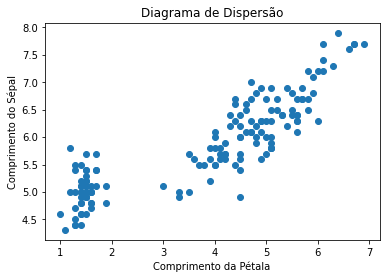

In [ ]:
plt.scatter(dados["PetalLengthCm"], dados["SepalLengthCm"])
plt.xlabel("Comprimento da Pétala")
plt.ylabel("Comprimento do Sépal")
plt.title("Diagrama de Dispersão")
plt.show()

In [ ]:
np.corrcoef(dados["PetalLengthCm"], dados["SepalLengthCm"])

array([[1.        , 0.87175416],
       [0.87175416, 1.        ]])

De acordo com o diagrama de dispersão acima, podemos perceber que há uma correlação linear positiva entre o comprimento da pétala e o comprimento do sépal.

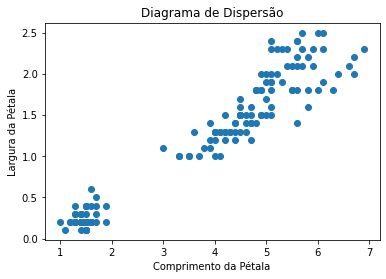

In [ ]:
plt.scatter(dados["PetalLengthCm"], dados["PetalWidthCm"])
plt.xlabel("Comprimento da Pétala")
plt.ylabel("Largura da Pétala")
plt.title("Diagrama de Dispersão")
plt.show()

In [ ]:
np.corrcoef(dados["PetalLengthCm"], dados["PetalWidthCm"])

array([[1.       , 0.9627571],
       [0.9627571, 1.       ]])

Calculando o coeficiente de correlação entre o comprimento e a largura da pétala foi possível perceber que o valor está próximo de um, o que indica uma correlação linear positiva.

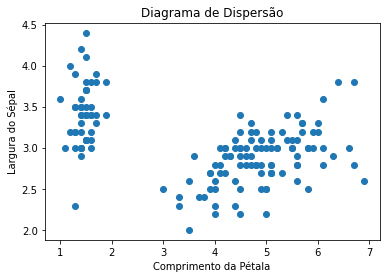

In [ ]:
plt.scatter(dados["PetalLengthCm"], dados["SepalWidthCm"])
plt.xlabel("Comprimento da Pétala")
plt.ylabel("Largura do Sépal")
plt.title("Diagrama de Dispersão")
plt.show()

In [ ]:
np.corrcoef(dados["PetalLengthCm"], dados["SepalWidthCm"])

array([[ 1.       , -0.4205161],
       [-0.4205161,  1.       ]])

É possível perceber que o comprimento da pétala e a largura do sépal possuem uma correlação negativa fraca, com base no diagrama de dispersão e no coeficiente de correlação igual a -0.42.

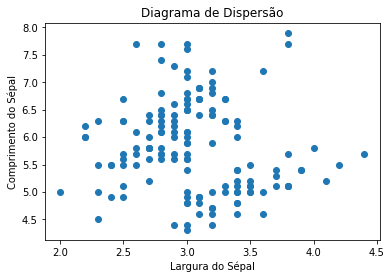

In [ ]:
plt.scatter(dados["SepalWidthCm"], dados["SepalLengthCm"])
plt.xlabel("Largura do Sépal")
plt.ylabel("Comprimento do Sépal")
plt.title("Diagrama de Dispersão")
plt.show()

In [ ]:
np.corrcoef(dados["SepalWidthCm"], dados["SepalLengthCm"])

array([[ 1.        , -0.10936925],
       [-0.10936925,  1.        ]])

Os atributos lárgura e comprimento do sépal não estão correlacionados entre si, possuindo um coeficiente de correlação negativo próximo de zero.

In [ ]:
corr = dados.corr()
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Esta tabela contém os valores de correlação entre todos os atributos das espécies de íris.

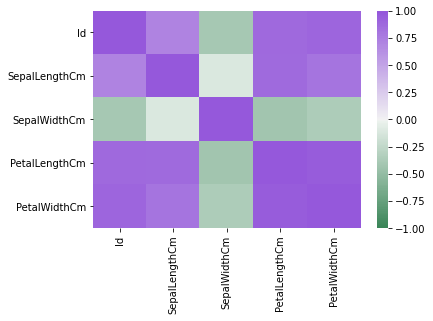

In [ ]:
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(500, 1000 ,n=900))

O mapa de calor ilustra bem os dados de correlação contidos na tabela acima, dando uma visão geral dos atributos correlacionados entre si.

**Regressão Linear**

Os dois atributos mais correlacionados do conjunto de dados são o comprimento da pétala e a largura da pétala. Então estes atributos serão utilizados para realizar previsões utilizando a equação de regressão.

In [ ]:
c_petala = dados["PetalLengthCm"]
l_petala = dados["PetalWidthCm"]

In [ ]:
m, b, r_value, p_value, std_err = stats.linregress(c_petala, l_petala)
m, b

(0.41641913228540123, -0.3665140452167277)

In [ ]:
# calculando a linha de regressao
linha_reg = [m * i + b for i in range(round((max(c_petala))+0.5))]

O comando round se fez necessário para que o laço de repetição podesse ser executado, visto que os valores dos atributos são do tipo ponto flutuante (float), arredondando o valor para um número do tipo inteiro.

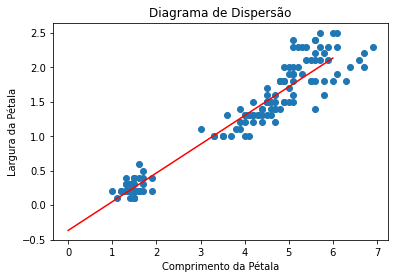

In [ ]:
plt.scatter(dados["PetalLengthCm"], dados["PetalWidthCm"])
plt.plot(linha_reg,"r")
plt.xlabel("Comprimento da Pétala")
plt.ylabel("Largura da Pétala")
plt.title("Diagrama de Dispersão")
plt.show()

*   Se um cliente se dirigisse a uma loja que vendesse íris com as mesmas características procurando uma flor que tenha uma pétala de 5cm de comprimento. Qual seria o valor previsto para a largura da pétala desta íris?
  *   Substituindo o valor na equação:
  * $\hat{y} = 0.41x + (-0.36) = 0.41*5 - 0.36 = 1.69$

Então, pode-se prever que a largura da pétala seria de 1.69 cm.



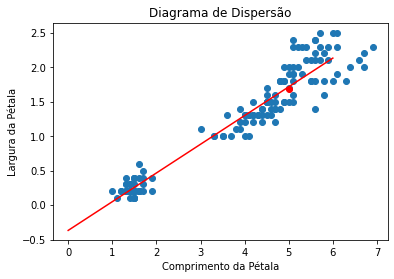

In [ ]:
plt.scatter(dados["PetalLengthCm"], dados["PetalWidthCm"])
plt.plot(linha_reg,"r")
plt.scatter(5,1.69, color="r")
plt.xlabel("Comprimento da Pétala")
plt.ylabel("Largura da Pétala")
plt.title("Diagrama de Dispersão")
plt.show()

Como podemos ver no gráfico, o ponto (5, 1.69) é adjacente à linha de regressão plotada no diagrama.

# **Conclusões**

Neste data set, foi possível concluir utilizando métricas de correlação entre atributos que as características mais correlacionadas são:


*   Comprimento da pétala e comprimento do sépal
*   Largura da pétala e comprimento do sépal
*   Comprimento e largura da pétala (maior correlação)

Também existem atributos com correlação negatica fraca como comprimento da pétala e largura do sépal. E também atributos que não possuem correlação como a largura e o comprimento do sépal.